# Tarea sobre Algebra Lineal con Python

## Ejercicio 1:
En data science y programación científica es común necesitar vectores con valores dentro de cierto intervalo, pero con sub-intervalos internos con diferente espaciamiento ,por ejemplo:

[0. , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.7 , 0.8 , 0.9 , 1. ]

El primer sub-intervalo incrementa de 0.1 en 0.1 , el segundo de 0.01 en 0.01 , y el tercero de 0.1 en 0.1 nuevamente.

Usando unicamente NumPy crea un vector de este tipo con el nombre xs .

nota: no es permitido usar ciclos, debe realizarse con operaciones "vectorizadas" de nump 1

In [2]:
import numpy as np

In [3]:
# tu codigo aqui (~ 5 lineas de codigo):
v1 = np.arange(0,0.5,0.1)
v2 = np.arange(0.5,0.6,0.01)
v3 = np.arange(0.6,1.01,0.1)
xs = np.hstack((v1,v2,v3))
xs

array([0.  , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.7 , 0.8 , 0.9 , 1.  ])

## Ejercicio 2: 

Suavizado de curvas a través de promedios de n-puntos(medias móviles):

<img src="https://www.luisllamas.es/wp-content/uploads/2017/03/arduino-filtro-media-movil-ventana-5.png">

En el mundo la data comunmente posee "ruido" por lo cual muchas veces antes de hacer análisis o modelado se necesita "suavizar" las curvas para reducir este ruido, una técnica muy sencilla es  el suavizado por promedio de n-puntos(también llamado media móvil), esto significa que para cada punto Xn obtenemos una versión transformada(suavizada) que consiste en promediar n puntos cercanos a el, por ejemplo para n= 3 tenemos que:

$$XS_{n}  =  \frac{X_{n-1}+X_{n}+X_{n+1}}{3}$$

In [4]:
# las siguientes 3 lineas generan un conjunto de datos que se comportan segun una onda senoidal pero tienen
# ruido por lo cual vamos a suavizar usando promedio de 3 puntos
# en este ejercicio los generamos manualmente pero pensemos que son datos que pudieron ser generados con algún
# instrumento como un sensor, o bien estar almacenados en una base de datos
sample_points = 10000

ruido = 0.5*np.random.randn(sample_points) #el ruido comunmente se debe a aleatoriedad o captura no exacta de info.
x = np.linspace(0,5*np.pi,sample_points) 
y = np.sin(x) + ruido

#ys es "y suavizado", inicialmente es una copia de y
ys =  y.copy()

for n in range(1,len(y)-1):
    ys[n] = (y[n-1] + y[n] + y[n+1])/3



    

In [5]:
import matplotlib.pyplot as plt

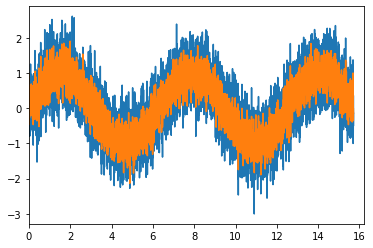

In [6]:
plt.plot(x,y)
plt.plot(x,ys)
plt.xlim(0,5*np.pi + 0.5)
plt.show()

**Ejercicio (parte de tarea)** En este caso usamos un ciclo  para ejemplificar pero ya hemos mencionado que debemos evitarlos siempre que sea posible y usar operaciones "vectorizadas" ya que es mucho mas rápido al utilizar  código pre-compilado de C, en este ejercicio debemos remplazar el calculo de ys para hacerlo de manera "vectorizada" y eliminar el ciclo for. 

**tip**: usar slicing

In [7]:
sample_points = 10000
ruido = 0.5*np.random.randn(sample_points) #el ruido comunmente se debe a aleatoriedad o captura no exacta de info.
x = np.linspace(0,5*np.pi,sample_points) 
y = np.sin(x) + ruido


ys =  y.copy()
y1 = np.hstack((ys[0],y[0:-2],ys[-1]))
y3 = np.hstack((ys[0],y[2:],ys[-1]))

ys = (y1+ys+y3)/3
print(ys)


[-0.16023742 -0.15206502  0.1938001  ... -0.27505554 -0.28046693
 -0.4795105 ]


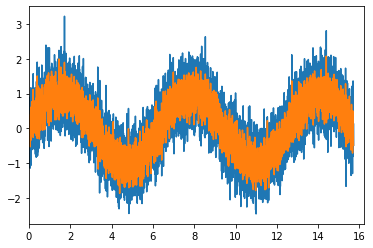

In [8]:
plt.plot(x,y)
plt.plot(x,ys)
plt.xlim(0,5*np.pi + 0.5)
plt.show()

## Ejercicio 3
Para calcular la información de una distribución de probabilidad necesitamos calcular el producto entre la información de cada posible x y su probabilidad , cada uno de estos elementos nos indica cuanta incerteza aporta cada x a la entropía de la distribución. Crea una función que calcule esto, debe recibir un vector representando a la dist. de probabilidad y devoler otro vector con el termino de entropía para cada x. Por ejemplo:

calcular_entropia([0.25,0.75])

Debe resultar en :

[0.5    ,    0.31127812]

**Nota**: la entropía es la suma sobre estos valores, en este caso no calculamos la entropía,unicamente los termimos de su sumatoria. La entropía es:

$$S = -\sum_i^nP(x_{i})log_{2}P(x_{i})$$


In [9]:
def calcula_valores_entropia(distribucion):
    informacion = np.log2(distribucion)*-1
    return distribucion*informacion
calcula_valores_entropia(np.array([0.25,0.75]))

array([0.5       , 0.31127812])

## Ejercicio 4

A partir de la información en un data warehouse con un modelo de  datos el valor de clientes en el tiempo se ha determinado un modelo predictivo  no lineal que estima cuanta ganancia ha generado cierto cliente en 5 años en base a lo que ha gastado en su primer mes como cliente. 

El modelo tiene la forma:

$$g(x) = (x^{3} + 2x^{2} + e^{0.0001x} -\sqrt{2x})/50$$

Crear una función que calcule la ganancia para valores de gasto de nuevos clientes:

Se ha determinado también que hay costos asociados a la comunicación y relación con los clientes(llamadas,mensajes electrónicos,etc) y que estos también tienen alta correlación con el monto que estos gastan en su primer més siguiendo el modelo:
$$c(x) = (x^{2} + x + log (0.0001x)-\sqrt{0.54x})/100$$

Cree una función para calcular este modelo sobre valores de de gasto de nuevos clientes , y luego cree una función  **ganancia_neta(x,g,c)** donde:
* x = vector conteniendo los valores de gasto del primer mes para nuevos clientes.
* g = función que estima la ganancia en función de x
* c = función que estima el costo en función de x

La función realiza el calculo simple **g(x) - c(x)** , ya que es posible que los modelos cambien en el tiempo es común recibir como parámetro el modelo o modelos hijos de un modelo mas grande , en este caso eso se logra recibiendo como parámetro las funciones de ganancia y costo.

In [10]:
def g(x):
    ganancia = (np.power(x,3) + 2.0*(np.power(x,2.0))+np.exp(0.0001*x) - np.sqrt(2.0*x))/50
    return ganancia
    

In [11]:
def c(x):
    costo = (np.power(x,2.0) + x + np.log(0.0001*x) - np.sqrt(0.54*x)) / 100
    return costo

In [12]:
def ganancia_neta(x,g,c):
    return g(x) - c(x)

In [13]:
gastos = np.array([100,50,25])
ganancia = g(gastos)
print("Ganancias:",ganancia)
costo = c(gastos)
print("Costos:",costo)
g_neta = ganancia_neta(gastos,g,c)
print("Ganancia neta:",g_neta)

Ganancias: [20399.73735829  2599.82010025   337.37862871]
Costos: [100.88046361  25.3950553    6.40334301]
Ganancia neta: [20298.85689469  2574.42504495   330.9752857 ]


## Ejercicio 5:
Aritmetica acumulativa
En muchos casos es útil usar sumas o productos acumulativos , por ejemplo:

Ejemplo aplicado En un datawarehouse se tiene un modelo "lifetime value" en el que se almacena de manera acumulativa cuantas ganancias se han percibido a lo largo de la vida de los usuarios, un ETL en Python debe calcularlo en función de un vector que contiene de manera ordenada en el tiempo los ingresos percibidos mensualmente para cierto usuario. Podemos usar la funcion np.cumsum para esto, en este ejercicio necesitamos determinar el "lifetime value" de cierto usuario en su 6to mes:

In [14]:
def lifetime_value(ganancias_mensuales):
    ## tu codigo aqui(~ 1 linea de codigo):
    return np.cumsum(ganancias_mensuales)

# Prueba:
ganancias_usuario = np.array([25,150,125,75,100,45,22,30])
lifetime_value_usuario = lifetime_value(ganancias_usuario)

print("Lifetime value:",lifetime_value_usuario)

print("El valor del usuario a su sexto mes es :",lifetime_value_usuario[5])

Lifetime value: [ 25 175 300 375 475 520 542 572]
El valor del usuario a su sexto mes es : 520


## Ejercicio 6: 
Usando argmax crear una función mode(x) para calcular la moda de un vector x , esta función debe devolver una tupla de 2 elementos de la forma:

(valor,conteo)

**tip** investigar y auxiliarse de otras funciones de numpy y np.argmax, no olvidar trabajar todo vectorizado, sin ciclos.

In [15]:
# np.unique --> https://docs.scipy.org/doc/numpy/reference/generated/numpy.unique.html

def mode(x):
    item_x, cant_x = np.unique(x, return_counts=True)
    max = np.argmax(cant_x)
    #retorno de tupla
    return (item_x[max], cant_x[max])

print(mode(np.array([1,5,2,3,4,5,5,2,7])))

(5, 3)


## Ejercicio 7: 
Crear una función para calcular la entropía  de una distribución de probabilidad representada como un vector.
$$S = -\sum_i^nP(x_{i})log_{2}P(x_{i})$$

**Nota**: a diferencia del ejercicio anterior donde solo calculamos los términos de la entropía, en este caso  si calculamos el valor completo de la entropía, que como mencionamos es una medida de incerteza en una distribución de probabilidad.

**recordatorio**: no usar ciclos solo operaciones vectorizadas.

In [16]:
def calcula_entropia(x):
    return np.sum(calcula_valores_entropia(x))
calcula_entropia(np.array([0.25,0.75]))

0.8112781244591328

## Ejercicio 8:
En ML usamos la entropía cruzada como una forma de medir que tan bueno es un modelo de variables discretas a través de comparar la distribución de probabilidad que el modelo produce o predice, vs la distribución de probabilidad real dada por los datos de entrenamiento.

Podemos ver el siguiente ejemplo que define la forma en que se calcula la entropía cruzada y nos muestra un caso específico:

<img src="https://image.slidesharecdn.com/publishintroductiontodeeplearninginpythonandmatlab1-160502102437/95/introduction-to-deep-learning-in-python-and-matlab-54-638.jpg?cb=1462185644">

En este caso interpretamos así: El problema consiste en un modelo o algoritmo de ML que debe producir un vector de 3 elementos indicando la probabilidad de que ciertos datos X pertenezcan a una de 3 categorías.

* El modelo de ML produce un vector que indica que estima un 70% de probabilidad de que se trate de la categoría 0, 20% de probabilidad de que se trate de la categoría 1 y 10% de que se trate de la categoría 2.
* Los datos reales nos dicen que se trataba de un caso donde con total certeza se sabe que se trata de la categoría 0
* La entropía cruzada(a calcular en el ejercicio) nos indica que tan buena es la estimación del modelo, una EC de 0 es un modelo perfecto(en este caso un modelo que predice 100% de prob para la clase 0)

**Nota** 
* Aunque para calcular la entropía usamos logaritmos en base 2, en ML para calcular la entropía cruzada se usa logaritmo natural ya que con este se cumple el proposito **estimar que tanto se alejan las predicciones del modelo de ML de los datos reales** y es comunmente mas rápido de calcular en la computadora.
* Ya que estamos trabajando con vectores que representan distribuciones de probabilidad , podemos toparnos con lo que se conoce como : **sparse vectors**(vectores donde la mayoría de elementos son 0), esto puede producir problemas ya que el logaritmo de 0 no esta definido, tu solución debe tomar en cuenta esto y evitar que devuelva "nan"

In [17]:
def calcular_entropia_cruzada(s,l):
    s_log = s.copy()
    s_log[s <= 0] = 0
    s_log[s > 0] = np.log(s[s > 0])
    print (s_log)
    return -1.0* np.sum(l*s_log)
s = np.array([0.7,0.2,0.1])
l = np.array([1.0,0.0,0.0])
calcular_entropia_cruzada(s,l)

[-0.35667494 -1.60943791 -2.30258509]


0.35667494393873245

## Ejercicio 9 : 
Crear una función que reciba como parámetro un vector x y calcule su magnitud o norma(euclidiana o L2) ,luego usarla para evaluar 2 vectores que representan los errores generados por 2 modelos de machine learning y concluir cual de los 2 modelos es mejor.

In [18]:
def magnitud(x):
    ## tu codigo aqui (~ 1 linea de codigo)
    return np.sqrt(np.sum(np.power(x,2)))
    

errores_modelo1 = np.array([1,2,1,2])
errores_modelo2 = np.array([0,1,1,2])

print(magnitud(errores_modelo1))
print(magnitud(errores_modelo2))

3.1622776601683795
2.449489742783178


**Conclusión:** El segundo modelo es mejor debido a que su magnitud es menor

## Ejercicio 10:
Usando la función del ejercicio anterior, crea otra función normalizar(x) que reciba de parámetro un vector x aplique normalización sobre este, el resultado debe ser un nuevo vector del tamaño de x cuya magnitud es igual a 1.0

In [19]:
def normalizar(x):
    ## tu codigo aqui (~ 3 linea de codigo)
    return x/magnitud(x)
        

print(magnitud(normalizar(errores_modelo1)))
print(normalizar(errores_modelo2))

1.0
[0.         0.40824829 0.40824829 0.81649658]


## Ejercicio 11:
Se tiene una red neuronal sencilla(y simplificada) como la de la siguiente imagen:
<img src="https://www.oreilly.com/library/view/practical-convolutional-neural/9781788392303/assets/246151fb-7893-448d-b9bb-7a87b387a24b.png">

Donde:
* INPUT LAYER: un vector X de tamaño = 2 que representa los datos de entrada
* HIDDEN_LAYER :capa oculta con 2 neuronas definidas por los vectores:
    * HL1 = [0.25,0.37]
    * HL2 = [-8,14]
* OUTPUT_LAYER = capa de salida definida por el vector [4,9]

Crear una funcion neural_network(X) para calcular:
* Calcule la salida de cada neurona en la capa intermedia aplicada a la capa de entrada.
* Use el resultado del paso anterior como entrada para la neurona en la capa de salida

Asumiendo que cada neurona identifica la similitud entre su entrada y la caracteística que representa concluir:
* Para cada vector de entrada Xi , cual neurona intermedia busca la característica que mas se parece a X.
* Cual vector de entrada Xi produce una activación alta(salida alta) en la capa de salida.

In [20]:
def neural_network(X):
    HL1 = np.array([0.25,0.37])
    HL2 = np.array([-8,14])
    OL = np.array([4,9])
    
    RL1 = np.dot(X,HL1)
    RL2 = np.dot(X,HL2)
    RO = np.dot(np.array([RL1,RL2]),OL)
    print(RL1,RL2,RO)
    return RO
    
# Aplicar la red neuronal sobre los siguientes datos X

X1 = np.array([0.50,0.72])
X2 = np.array([-4,7])
X3 = np.zeros_like(X2)
X4 = np.ones_like(X1)
X5 = np.random.randn(X1.shape[0])

neural_network(X1)
neural_network(X2)
neural_network(X3)
neural_network(X4)
neural_network(X5)


0.39139999999999997 6.08 56.2856
1.5899999999999999 130 1176.36
0.0 0 0.0
0.62 6.0 56.48
0.04841233918721466 -19.191018115669316 -172.52551368427498


-172.52551368427498

**Conclusiones:**
<br>
Para el vector X1 la neurona intermedia que busca la característica que mas se parece a X es: **HL2 = [-8,14]**
 <br>
Para el vector X2 la neurona intermedia que busca la característica que mas se parece a X es: **HL2 = [-8,14]**
 <br>
Para el vector X3 la neurona intermedia que busca la característica que mas se parece a X es: **Ambos resultados son iguales**
<br>
Para el vector X4 la neurona intermedia que busca la característica que mas se parece a X es: **HL2 = [-8,14]**
<br>
Para el vector X5 la neurona intermedia que busca la característica que mas se parece a X es: **HL1 = [0.25,0.37]**
<br><br>
El vector de entrada quei produce una activación alta(salida alta) en la capa de salida es: **X2 = np.array([-4,7])**

## Ejercicio 12: 
La correlación cruzada es una medida de similitud entre 2 funciones como resultado de "desplazar" una sobre la otra, comunmente es usada para encontrar características relevantes en una función desconocida o no controlada.

En procesamiento de señales por ejemplo es usada para buscar y/o filtrar en una señal que varia en el tiempo cierta caracaterística de interés. Aveces es llamada también "sliding dot product" consiste en aplicar en cada punto de una función F el producto punto con cierta función G(comunmente mas corta) y luego "deslizar" G a un nuevo punto de la función, el resultado es una nueva función H que se interpreta como :**cuanto se parece** en cada punto la función F a la característica G. 

<img src="https://i.makeagif.com/media/11-25-2015/LZ9Ufj.gif">

En este ejercicio usamos correlación cruzada para calcular las medias moviles promediando 3 puntos que ya vimos en otro ejemplo:

El primer paso es definir la función G que define el "filtro" a aplicar, para este caso consiste simplemente en un vector con 3 elementos donde cada elemento corresponde a 1/3, luego debemos aplicar el producto punto sobre cada punto de la función o datos originales(en este ejemplo llamados x) a traves aplicar el producto punto en cada elemento "corriendolo" de uno en uno

In [21]:
ruido = 0.1*np.random.randn(15) #el ruido comunmente se debe a aleatoriedad o captura no exacta de info.
x = np.linspace(0,2*np.pi,15) + ruido
x = np.sin(x)

filtro = np.array([1/3,1/3,1/3])

## tu codigo aqui (~ 3 linea de codigo)
x_aux = x.copy()
for i in range(1,len(x)-1):
    x_aux[i] = np.dot(x_aux[i-1:i+2], filtro)    

print(x_aux)

[-0.02044546  0.34464464  0.67967876  0.87252698  0.87023021  0.66053421
  0.31724094  0.00978087 -0.28706898 -0.64062652 -0.87132629 -0.88117223
 -0.69295979 -0.41335459 -0.14281757]


## Ejercio 13:
Dado el vector x, usar operadores lógicos sobre vectores y acceso a  elementos usando vectores booleanos , escribir un programa que calcule un nuevo vector z conteniendo el valor absoluto del vector x.

**nota** No se puede usar np.abs() ni ciclos

**tip** usar un vector booleano para saber que elementos son negativos y deben ser multiplicados por -1

In [22]:
x = np.linspace(-2,2,9)

## tu codigo aqui (~ 4 linea de codigo)
z = x.copy()
z[z<0] = z[z<0] * -1
print(x)
print(z)

[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
[2.  1.5 1.  0.5 0.  0.5 1.  1.5 2. ]


## Ejercicio 14:
Implementar la función:
$$h(x) = \begin{cases}0 & x< 0\\1 & 0<=x <=1\\0 & x> 1\end{cases}$$

Esta debe funcionar para vectores de cualquier tamaño x:

def h(x):

    ...

**nota** debe ser implementada sin ciclos o ifs 

In [23]:
def h(x):
    ## tu codigo aqui (~ 3 linea de codigo)
    h = x.copy()
    h[x<0] = 0
    h[(x >= 0)&(x <= 1)] = 1
    h[x>1] = 0
    return h

x = np.array([0.1,-2,0.5,5])
print(h(x))


[1. 0. 1. 0.]


## Ejercicio 15:

Usando select implementar una función k(x) con la siguiente definición:
$$k(x) = \begin{cases}-x & x< 0\\x^{3}  &0<=x<1\\x^{2}  &1<=x<2\\4  &otherwise\end{cases}$$

In [24]:
def k(x):
    condiciones = [x < 0, (x >= 0)*(x < 1), (x >= 1)*(x < 2)]
    resultado = [-x, np.power(x,3), np.power(x,2)]
    h = np.select(condiciones, resultado, default=4)
    return h

x = np.array([-5,-0.1,0,0.5,1,1.5,2,10])
print(k(x))

[5.    0.1   0.    0.125 1.    2.25  4.    4.   ]


## Ejercicio 16: 
Investigar piecewise y:
*  Usarlo para implementar la función anterior de manera eficiente
*  Usar piscewise para implementar la función:

$$m(x) = \begin{cases}e^{2x} & x< 0\\1  &0<=x<1\\e^{1-x}  &x>=1\\\end{cases}$$

Nuevamente, sin utilizar ciclos ni ifs

In [25]:
#piecewise--> https://docs.scipy.org/doc/numpy/reference/generated/numpy.piecewise.html?highlight=piecewise#numpy.piecewise
def m(x):
    return np.piecewise( x, [x<0,(x>=0)*(x<1),x>=1], [lambda x:np.exp(2*x),1,lambda x:np.exp(1-x)] )
x = np.array([0.1,-2,0.5,5,0,1])
print(m(x))

[1.         0.01831564 1.         0.01831564 1.         1.        ]


# Investigación

## Proyección vectorial:
La proyección vectorial puede entenderse de una forma simple como la "sombra que un vector proyecta en otro", si los vectores son perpendiculares (angulo de 90 grados) no existe la proyección de ningún vector.

<img src="imagenes/ProyeccionVectorial.png">
<br><br>

### Ejemplo: 
Calcular la proyección de **u=2i+3j-k** sobre **v=5i-2j+2k**
<br>
<img src="imagenes/ProyeccionVectorialEjemplo1.png">
<br><br>
<img src="imagenes/ProyeccionVectorialEjemplo2.png">

   

In [26]:
#Definir una función para calculo en numpy
def proyeccion_vectoria(u,v):
    return np.inner(u,v)/np.power(magnitud(v),2)*v
u=np.array([2,3,-1])
v=np.array([5,-2,2])

proyeccion_vectoria(u,v)


array([ 0.3030303 , -0.12121212,  0.12121212])

### Interpretación de proyección vectorial:
**Interpretación geométrica:** Si proyectamos el vector **u** sobre el vector **v** se forma un triángulo rectanculo y podemos decir que el producto escalar de dos vectores es igual al módulo de uno de ellos por la proyección del otro sobre el primero.

En el siguiente ejemplo tenemos dos vectores perpendiculares (angulo de 90 grados) y al aplicar la función se puede ver que la proyección de un vector sobre el otro devuelve 0 debido a que no es posible proyectar un vector sobre otro que es perpendicular a este.


In [27]:
u=np.array([0,5])
v=np.array([15,0])

proyeccion_vectoria(u,v)

array([0., 0.])

### Aplicación o caso de uso en DS de proyección vectorial: 

solo se necesita nombrar el caso de uso, no desarrollarlo o programarlo, tip: Hay un algoritmo de ML cuyo nombre puede ser  útil.


El **ACP** (análisis de componentes principales, en ingles **PCA** principal component analysis) es una de las técnica utilizada en aprendizaje no supervisado, se aplica principalmente en el análisis exploratorio de los datos.

El **ACP**  permite la reducción de dimensionalidad (variables), perdiendo la menor cantidad de información (varianza) posible: cuando exiten gran cantidad de variables cuantitativas que posiblemente estén correlacionadas (indicativo de existencia de información redundante), con PCA pueden ser reducidas a un número menor de variables transformadas (componentes principales) que expliquen gran parte de la variabilidad en los datos.


<img src="imagenes/PCA.png">


## Producto cruz

También denominado producto vectorial, es un operación entre dos vectores cuyo resultado es otro vector que es perpendicular a los vectores sobre los cuales se aplicó la operación. 

**Producto vectorial según el angulo entre vectores**
<img src="imagenes/ProductoVectorialAngulos.gif">

### Ejmplo 1 producto cruz:
<img src="imagenes/ProductoVectorialEjemplo.png">


In [28]:
#Cálculo en numpy Ejemplo 1 producto cruz:
a = np.array([2,0,1])  
b = np.array([1,-1,3])  
aXb = np.cross(a,b)
print (aXb)

[ 1 -5 -2]


### Interpretación de producto cruz:
**Interpretación geométrica:** 
El producto cruz aplicado a vectores de permite encontrar el área de un paralelogramo 
<img src="imagenes/ProductoVectorialInterpretacion.png">
Referencia: https://www.geogebra.org/m/B6Uz5yWf

In [33]:
#Cálculo en numpy área del paralelogramo:
v = np.array([2,-2,3])  
w = np.array([2,2,2])  
vXw = np.cross(v,w)
print ("Área:",magnitud(vXw))

Área: 12.96148139681572


El resultado del producto cruz entre 2 vectores permite encontrar un vector perpendicular a estos. Por ejemplo el resultado del Ejemplo 1 producto cruz: **aXb** = [1,-5,-2]  es perpendicular a **a**=[2,0,1] y **b**=[1,-1,3]
esto se puede corroborar realizando el producto punto entre **aXb** y **a** o **b** cuyo resultado cerá igual a cero (recordar que si el producto punto entre 2 vectores es 0 significa que son perpendiculares)

In [31]:
print(np.inner(aXb,a))
print(np.inner(aXb,b))

0
0


### Aplicación o caso de uso de producto cruz: 
Permite calcular el área y volumen de un paralelepípedo 
<img src="imagenes/ProductoVectorialAplicacion.png">
Referencia: https://www.geogebra.org/m/B6Uz5yWf



In [32]:
#Cálculo en numpy área y volumen del paralelepípedo:
v = np.array([3,2,-2])  
w = np.array([-2.29,3.43,0])  
u = np.array([1.66,1.11,3.61])
vXw = np.cross(v,w)
print(vXw)
print ("Área:",magnitud(vXw))
print ("Volúmen:",np.abs(np.sum(u*vXw))) #suma de productos
print ("Volúmen:",np.abs(np.inner(u,vXw))) #producto punto

[ 6.86  4.58 14.87]
Área: 17.00449646417088
Volúmen: 70.1521
Volúmen: 70.1521
